In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
sns.set()
import warnings
warnings.filterwarnings('ignore')

**prepare distance matrix for polygons centers**

In [2]:
# load clusters
clusters = pickle.load(open("clusters.pcl", "rb"))
centers = clusters.cluster_centers_

In [3]:
# distance matrix computation
centers_rad = [np.asarray([radians(x[0]), radians(x[1])]) for x in centers]
R_EARTH = 6371
D = haversine_distances(centers_rad) * R_EARTH
print(D)

[[    0.          9097.31101845  7659.49070656 ... 10288.54099038
   7420.57847154 10917.46217315]
 [ 9097.31101845     0.         14804.75437293 ...  2604.53838592
   2026.77936376  5216.66913925]
 [ 7659.49070656 14804.75437293     0.         ... 13402.67540048
  12854.18731513 11225.84388115]
 ...
 [10288.54099038  2604.53838592 13402.67540048 ...     0.
   3073.87300447  2646.60304662]
 [ 7420.57847154  2026.77936376 12854.18731513 ...  3073.87300447
      0.          5044.47620839]
 [10917.46217315  5216.66913925 11225.84388115 ...  2646.60304662
   5044.47620839     0.        ]]


**distance-based errors and distance fraction for small dataset**

In [4]:
confusion_matrix = pickle.load(open("confusion.pcl", "rb"))
confusion_matrix

array([[14456,     0,     1, ...,     0,     1,     0],
       [    0,   683,     0, ...,     0,     0,     0],
       [   13,     0,  7258, ...,     0,     0,     0],
       ...,
       [    1,     0,     0, ...,  2164,     3,     1],
       [    2,     0,     0, ...,     0,   566,     0],
       [    0,     0,     0, ...,     6,     0,   748]])

In [5]:
# distance-based errors
cm = confusion_matrix / np.sum(confusion_matrix, axis=1)
distances = np.sum(np.multiply(cm, D), axis=1)
label_distr = np.sum(confusion_matrix, axis=0) / np.sum(confusion_matrix)

distances = np.sum(np.multiply(distances, label_distr))
print(distances)

837.3713899106401


In [6]:
# distance fraction compared to random guessing
pred_dists = np.multiply(confusion_matrix, D)
pred_dists = np.sum(pred_dists, axis=1)
pred_dists = np.multiply(pred_dists, 1/np.sum(confusion_matrix, axis=1))
avg_dist = np.sum(D, axis=1) / 150

ratios = pred_dists/ avg_dist

np.mean(ratios)

0.10036129983594558

In [7]:
distance_values = []
np.fill_diagonal(confusion_matrix, 0)

for i in range(150):
    for j in range(150):
        n_samples = confusion_matrix[i, j]
        for _ in range(n_samples):
            distance_values.append(D[i,j])

In [8]:
D.mean()

8800.30656393011

[Text(0.5, 0, '')]

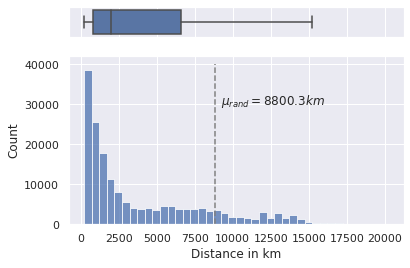

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# add histplot
plt.rcParams['text.usetex'] = False

sns.histplot(distance_values, binwidth=500, ax=ax_hist) #, kde=True)
plt.xlabel("Distance in km")
#plt.yscale("log")

# add random guess distance
plt.vlines(D.mean(), 0, 4*10**4, color="grey", linestyles="dashed")
plt.text(1.05*D.mean(), 3*10**4, "$\mu_{rand}=8800.3km$")#.format(round(D.mean(),1)))

# add boxplot
sns.boxplot(distance_values, showfliers=False, ax=ax_box)
ax_box.set(xlabel='')
#plt.savefig("misclassification_distribution.pdf", bbox_inches="tight")

**distance-based errors and distance fraction on large dataset**

In [10]:
confusion_matrix = pickle.load(open("../q3/confusion_matrix_hierarchical_forwarding.pcl", "rb"))
predicted_labels = pickle.load(open("../q3/predicted_labels2.pcl", "rb"))
print(confusion_matrix)

[[81005     0     4 ...     0     2     0]
 [    4  3542     0 ...     1     0     1]
 [   17     0 40230 ...     0     1     0]
 ...
 [    6     0     1 ... 12205     0     2]
 [    0     0     0 ...     4  2936     0]
 [    2     0     1 ...     7     5  4435]]


In [11]:
# distance-based errors
cm = confusion_matrix / np.sum(confusion_matrix, axis=1)
distances = np.sum(np.multiply(cm, D), axis=1)
label_distr = np.sum(confusion_matrix, axis=0) / np.sum(confusion_matrix)

distances = np.sum(np.multiply(distances, label_distr))
print(distances)

346.1829462733723


In [12]:
# distance fraction compared to random guessing
pred_dists = np.multiply(confusion_matrix, D)
pred_dists = np.sum(pred_dists, axis=1)
pred_dists = np.multiply(pred_dists, 1/np.sum(confusion_matrix, axis=1))
avg_dist = np.sum(D, axis=1) / 150

ratios = pred_dists/ avg_dist

np.mean(ratios)

0.05413154149856118

In [13]:
distance_values = []
np.fill_diagonal(confusion_matrix, 0)

for i in range(150):
    for j in range(150):
        n_samples = confusion_matrix[i, j]
        for _ in range(n_samples):
            distance_values.append(D[i,j])

In [14]:
D.mean()

8800.30656393011

[Text(0.5, 0, '')]

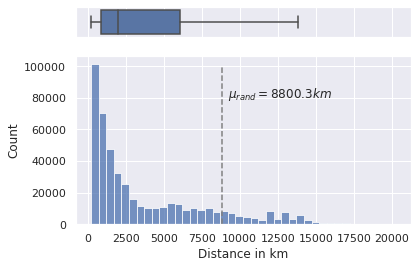

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# add histplot
plt.rcParams['text.usetex'] = False
sns.histplot(distance_values, binwidth=500, ax=ax_hist) #, kde=True)
plt.xlabel("Distance in km")

# add random guess distance
plt.vlines(D.mean(), 0, 10**5, color="grey", linestyles="dashed")
plt.text(1.05*D.mean(), .8*10**5, "$\mu_{rand}=8800.3km$")#.format(round(D.mean(),1)))

# add boxplot
sns.boxplot(distance_values, showfliers=False, ax=ax_box)
ax_box.set(xlabel='')
#plt.savefig("misclassification_distribution.pdf", bbox_inches="tight")